<a href="https://colab.research.google.com/github/sneha-10-tyagi/Netflix/blob/main/NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

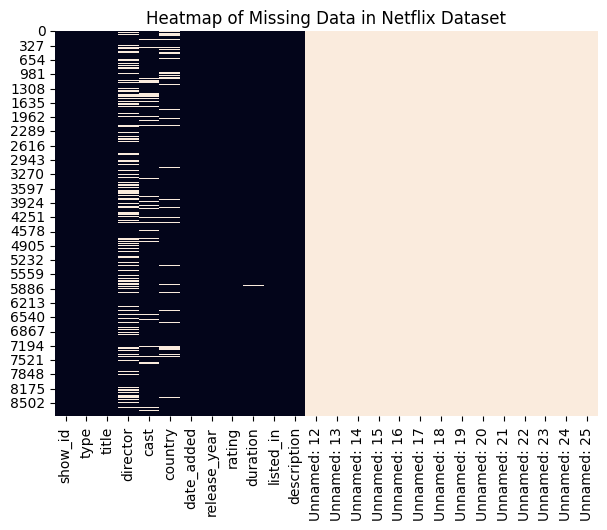

In [ ]:
#libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#dataset upload
df = pd.read_csv('/content/netflix_dataset.csv', encoding='latin1')
df.head()

#dropping the duplicate values
df.drop_duplicates(inplace=True)

# Visualisation of missing data using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap of Missing Data in Netflix Dataset')
plt.show()


show_id           0.000000
type              0.000000
title             0.000000
director         29.901237
cast              9.365422
country           9.433534
date_added        0.113520
release_year      0.000000
rating            0.045408
duration          0.034056
listed_in         0.000000
description       0.000000
Unnamed: 12     100.000000
Unnamed: 13     100.000000
Unnamed: 14     100.000000
Unnamed: 15     100.000000
Unnamed: 16     100.000000
Unnamed: 17     100.000000
Unnamed: 18     100.000000
Unnamed: 19     100.000000
Unnamed: 20     100.000000
Unnamed: 21     100.000000
Unnamed: 22     100.000000
Unnamed: 23     100.000000
Unnamed: 24     100.000000
Unnamed: 25     100.000000
dtype: float64


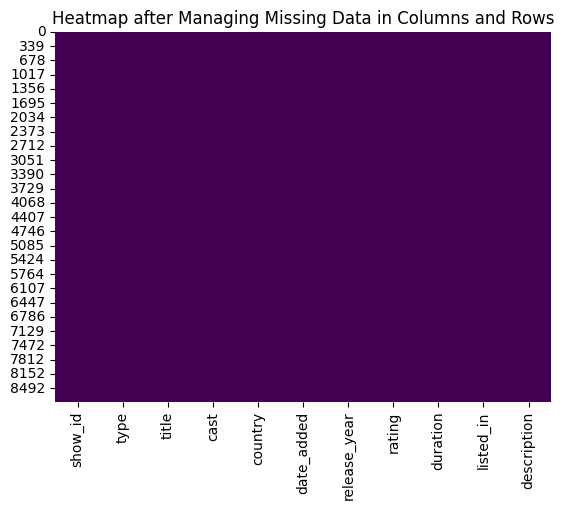

In [ ]:
#calculating percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

# Drop director column
df.drop(columns=['director'], inplace=True)

#updating missing values with unknown
df.fillna({'cast': 'Unknown'}, inplace=True)
df.fillna({'country': 'Unknown'}, inplace=True)

#dropping rows with less than 10% missing values
df.dropna(subset=['duration'], inplace=True)
df.dropna(subset=['rating'], inplace=True)
df.dropna(subset=['date_added'], inplace=True)

#dropping columns with NaN
df.dropna(axis=1, how='all', inplace=True)

# Verify missing data again
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap after Managing Missing Data in Columns and Rows')
plt.show()

In [ ]:
#EXPLORATORY DATA ANALYSIS (EDA)

# stats for numerical columns
df.describe()

#unique count for categorical columns
df['rating'].value_counts()


,count
rating,
TV-MA,3206
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


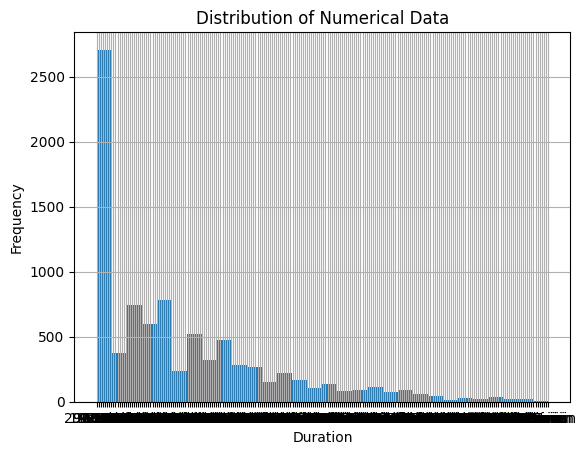

<Figure size 600x500 with 0 Axes>

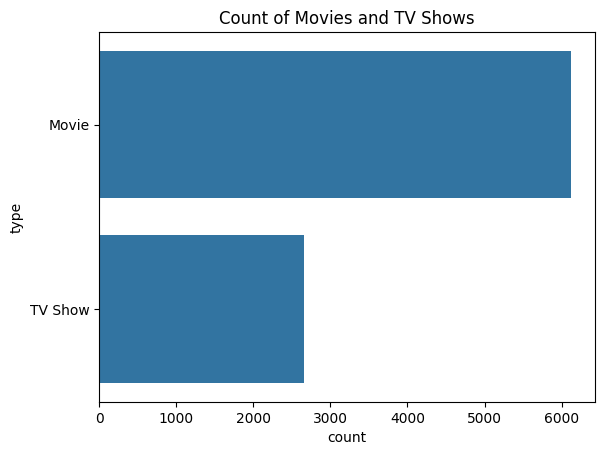

<Figure size 500x500 with 0 Axes>

In [ ]:
#DATA VISUALISATION

#histogram - numerical data
df['duration'].hist(bins=30)
plt.title('Distribution of Numerical Data')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.figure(figsize=(6,5))
plt.show()

#bar chart - categorical data
sns.countplot(y='type', data=df)
plt.title('Count of Movies and TV Shows')
plt.figure(figsize=(5,5))
plt.show()


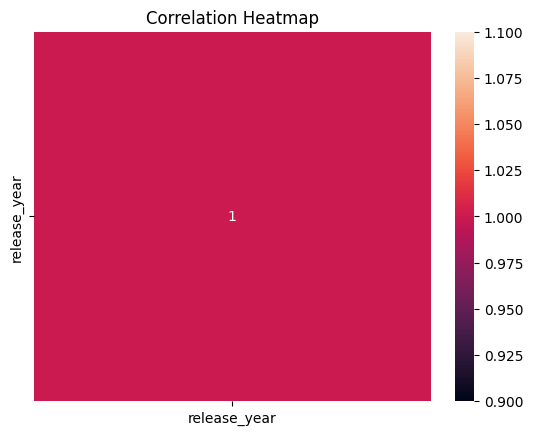

<Figure size 500x500 with 0 Axes>

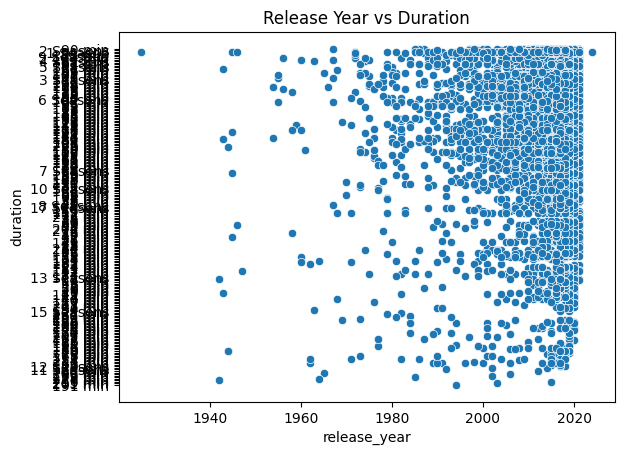

<Figure size 900x500 with 0 Axes>

In [ ]:
#correlation heatmap
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.figure(figsize=(5,5))
plt.show()

#scatter plot
sns.scatterplot(x='release_year', y='duration', data=df)
plt.title('Release Year vs Duration')
plt.figure(figsize=(9,5))
plt.show()


Text(0.5, 1.0, 'Presence of Mental Health Themes in Netflix Content')

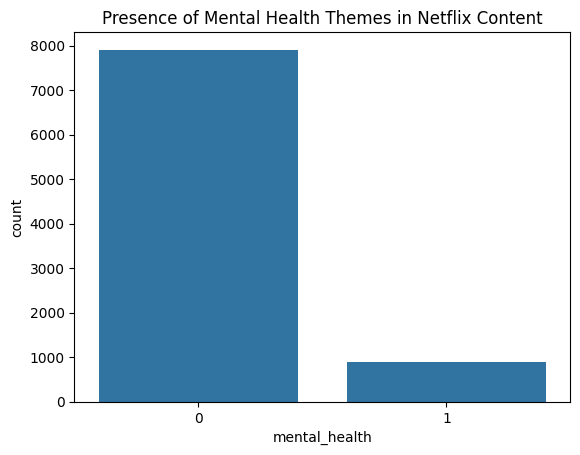

In [ ]:
#How well does Netflix promote mental health theme in its content offerings, based on the keywords and themes?

# Check for presence of mental health-related keywords in descriptions
df['mental_health'] = df['description'].apply(lambda x: 1 if 'depression' in x.lower() or 'anxiety' in x.lower() or 'help' in x.lower() or 'trauma' in x.lower() or 'obstacles' in x.lower() or 'cry' in x.lower() or 'murder' in x.lower() or 'suicide' in x.lower() or 'bipolar' in x.lower() or 'stress' in x.lower() or 'addiction' in x.lower() or 'phobia' in x.lower() or 'panic' in x.lower() or 'suicide' in x.lower() or 'loneliness' in x.lower() or 'panic' in x.lower() or 'therapy' in x.lower() or 'abuse' in x.lower() or 'healing' in x.lower() else 0)

# Visualisation
sns.countplot(x='mental_health', data=df)
plt.title('Presence of Mental Health Themes in Netflix Content')




mental_health
0    7909
1     883
Name: count, dtype: int64
Total number of hours for all Netflix content: 56849.45 hours
Total hours spent on watching mental health-themed content: 5581.78 hours


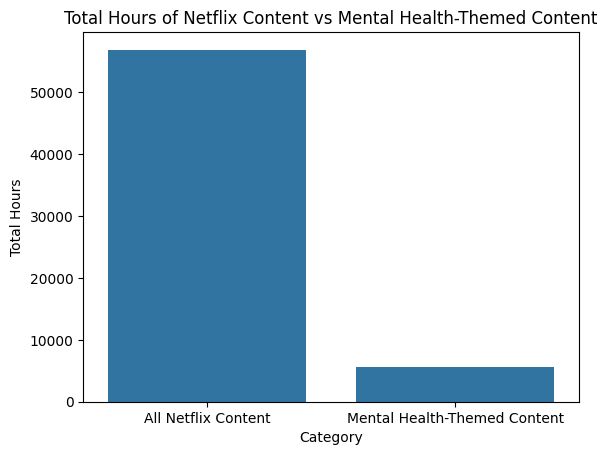

In [ ]:
#total hours spent watching content on mental health theme?

df['mental_health'] = df['description'].apply(lambda x: 1 if 'depression' in x.lower() or 'anxiety' in x.lower() or 'help' in x.lower() or 'trauma' in x.lower() or 'obstacles' in x.lower() or 'cry' in x.lower() or 'murder' in x.lower() or 'suicide' in x.lower() or 'bipolar' in x.lower() or 'stress' in x.lower() or 'addiction' in x.lower() or 'phobia' in x.lower() or 'panic' in x.lower() or 'suicide' in x.lower() or 'loneliness' in x.lower() or 'panic' in x.lower() or 'therapy' in x.lower() or 'abuse' in x.lower() or 'healing' in x.lower() else 0)
# Count the number of movies/shows with and without mental health themes
count_mental_health = df['mental_health'].value_counts()
print(count_mental_health)

# Defining a list of mental health-related keywords
mental_health_keywords = ['depression', 'anxiety', 'help', 'trauma', 'obstacles', 'cry', 'murder', 'suicide', 'bipolar', 'stress', 'addiction', 'phobia', 'panic', 'suicide', 'loneliness', 'panic', 'therapy', 'abuse', 'healing']

# new column to classify countries
df['theme'] = df['mental_health'].apply(lambda x: 'mental' if any(keyword in str(x).lower() for keyword in mental_health_keywords) else 'Non-mental' if any(keyword in str(x).lower() for keyword in mental_health_keywords) else 'Unknown')


# Conversion to minutes : function
def convert_duration(duration):
    if 'min' in duration:
        # number of minutes for movies
        return int(duration.split(' ')[0])
    elif 'Season' in duration:
        # Approximate : each season to 10 hours
        return int(duration.split(' ')[0]) * 10 * 60
    else:
        return 0


# conversion function
df['duration_in_minutes'] = df['duration'].apply(convert_duration)
# Sum
total_minutes_all_content = df['duration_in_minutes'].sum()
# minutes to hours
total_hours_all_content = total_minutes_all_content / 60

print(f"Total number of hours for all Netflix content: {total_hours_all_content:.2f} hours")


# conversion function
df['duration_in_minutes'] = df['duration'].apply(convert_duration)
# mental health themes content
mental_health_content = df[df['mental_health'] == 1]
# total duration in minutes
total_minutes = mental_health_content['duration_in_minutes'].sum()
# minutes to hours
total_hours = total_minutes / 60

print(f"Total hours spent on watching mental health-themed content: {total_hours:.2f} hours")

#visualisation
hours_data = pd.DataFrame({
    'Category': ['All Netflix Content', 'Mental Health-Themed Content'],
    'Hours': [total_hours_all_content, total_hours]
})

#bar plot comparing the two
sns.barplot(x='Category', y='Hours', data=hours_data)
plt.title('Total Hours of Netflix Content vs Mental Health-Themed Content')
plt.ylabel('Total Hours')
plt.show()



region
Western        5180
Non-Western    2375
Name: count, dtype: int64


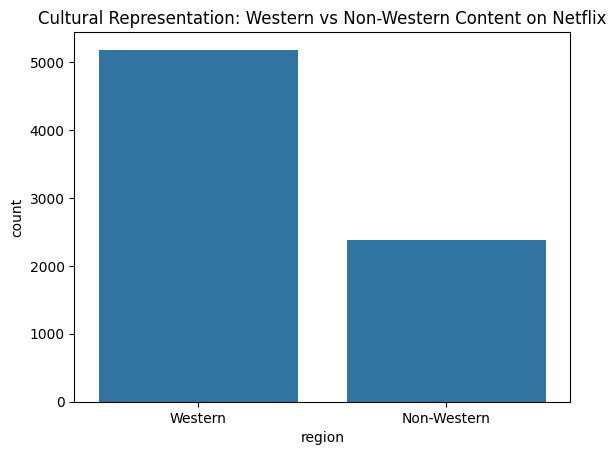

<ipython-input-17-b9202e7be306>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_western_content['themes'] = non_western_content['listed_in'].str.split(', ')


themes
International Movies      1573
Dramas                     996
Comedies                   599
International TV Shows     568
Action & Adventure         281
Romantic Movies            273
TV Dramas                  198
Independent Movies         192
Romantic TV Shows          160
Thrillers                  143
Name: count, dtype: int64


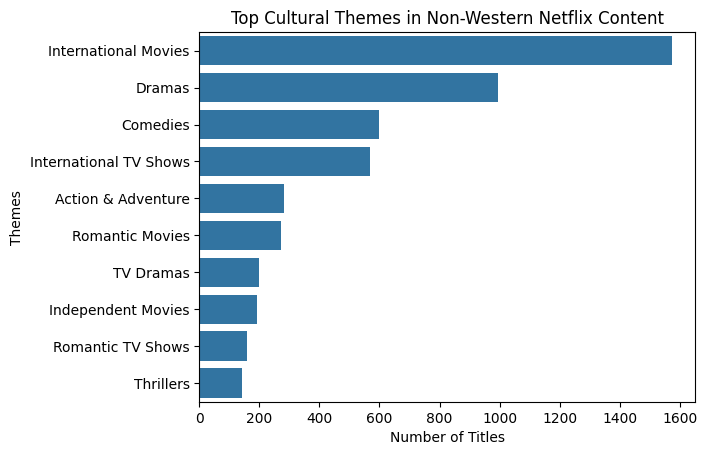

In [ ]:
#How well does Netflix promote global cultural diversity in its content offerings, based on the country of production and themes?

# list of Western and Non-Western countries
western_countries = ['United States', 'Canada', 'United Kingdom', 'Australia', 'New Zealand', 'France', 'Germany', 'Spain', 'Italy', 'Ireland', 'Netherlands', 'Sweden', 'Norway', 'Denmark', 'Belgium']
non_western_countries = ['India', 'Japan', 'South Korea', 'China', 'Mexico', 'Brazil', 'Argentina', 'South Africa', 'Nigeria', 'Kenya', 'Turkey', 'Russia', 'Thailand', 'Indonesia', 'Philippines', 'Egypt']

# new column to classify the countries
df['region'] = df['country'].apply(lambda x: 'Western' if any(country in x for country in western_countries) else 'Non-Western' if any(country in x for country in non_western_countries) else 'Unknown')

# Filter for rows where the country is known
df_filtered = df[df['region'] != 'Unknown']

# Count the number of movies/shows from Western and Non-Western regions
region_count = df_filtered['region'].value_counts()
print(region_count)

# Visualisation
sns.countplot(x='region', data=df_filtered)
plt.title('Cultural Representation: Western vs Non-Western Content on Netflix')
plt.show()

# Analysing the themes for Non-Western countries
non_western_content = df_filtered[df_filtered['region'] == 'Non-Western']

# Split the 'listed_in' column to analyse cultural themes
non_western_content['themes'] = non_western_content['listed_in'].str.split(', ')

# divide the themes into separate rows
non_western_themes = non_western_content.explode('themes')

# Count and visualize the most common cultural themes in Non-Western content
theme_counts = non_western_themes['themes'].value_counts().head(10)  # Top 10 themes
print(theme_counts)

# Plot the top cultural themes in Non-Western content
sns.barplot(x=theme_counts.values, y=theme_counts.index)
plt.title('Top Cultural Themes in Non-Western Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Themes')
plt.show()



